In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("../data/car.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f59ad9b53c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f59ad9b57e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f59ad9b5120>],
 'medians': [<matplotlib.lines.Line2D at 0x7f59ad9b5d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f59ad9b5fc0>],
 'means': []}

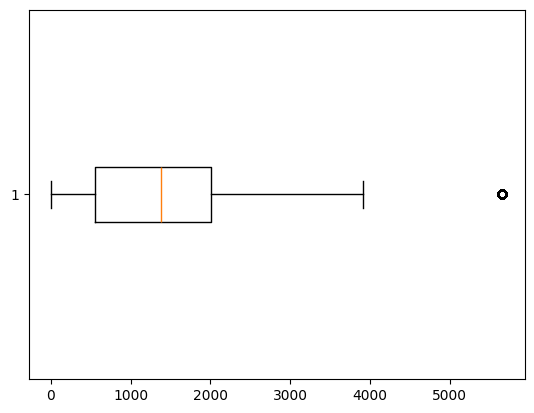

In [5]:
plt.boxplot(cars["Popularity"], vert = False)

In [10]:
quantil_1 = cars["Popularity"].quantile(0.25)
quantil_3 = cars["Popularity"].quantile(0.75)
IQR = quantil_3 -quantil_1
print(IQR)

1460.0


In [12]:
lower_bound = quantil_1 - 1.5 * IQR
upper_bound = quantil_3 + 1.5 * IQR

cars[(cars["Popularity"] < lower_bound) | (cars["Popularity"] > upper_bound)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1331,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Cargo Minivan,22,16,5657,2000
1332,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,22,15,5657,2000
1333,Ford,Aerostar,1995,regular unleaded,155.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Passenger Minivan,18,14,5657,2000
1334,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Passenger Minivan,22,15,5657,2000
1335,Ford,Aerostar,1996,regular unleaded,140.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,21,15,5657,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657,23070
11444,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657,26315
11445,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657,29230
11446,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657,34825


In [14]:
cars = cars.drop(["Market Category"], axis = 1)
cars = cars.dropna()
cars.shape

(11812, 15)

In [15]:
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [17]:
pd.get_dummies(cars["Make"], dtype = int)

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Porsche,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Toyota,Volkswagen,Volvo
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.factorize(cars["Make"])

(array([ 0,  0,  0, ..., 35, 35, 30]),
 Index(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan', 'Volvo',
        'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota', 'McLaren',
        'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC', 'Hyundai', 'Plymouth',
        'Honda', 'Oldsmobile', 'Suzuki', 'Ford', 'Cadillac', 'Kia', 'Bentley',
        'Chevrolet', 'Dodge', 'Lamborghini', 'Lincoln', 'Subaru', 'Volkswagen',
        'Spyker', 'Buick', 'Acura', 'Rolls-Royce', 'Maserati', 'Lexus',
        'Aston Martin', 'Land Rover', 'Lotus', 'Infiniti', 'Scion', 'Genesis',
        'HUMMER', 'Bugatti'],
       dtype='object'))

In [20]:
cars.nunique()

Make                   47
Model                 904
Year                   28
Engine Fuel Type        9
Engine HP             355
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Vehicle Size            3
Vehicle Style          16
highway MPG            44
city mpg               50
Popularity             47
MSRP                 6013
dtype: int64

In [25]:
def add_dummies(df , cols):
    dummies = pd.get_dummies(df[cols], dtype = int , prefix = cols)
    result = pd.concat([df, dummies], axis = 1)
    return result

def add_factorization(df, column):
    result = df.copy()
    result[f"{column}_encoded"] = pd.factorize(df[column])[0]
    return result

In [27]:
cars_encoded = cars.copy()
cars_encoded = add_dummies(cars_encoded, "Make")
cars_encoded = add_factorization(cars_encoded, "Model")

In [35]:
cars_encoded =  cars_encoded.drop(["Make", "Model", "Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style"], axis = 1)

KeyError: "['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'] not found in axis"

In [36]:
cars_encoded.dtypes

Year                    int64
Engine HP             float64
Engine Cylinders      float64
Number of Doors       float64
highway MPG             int64
city mpg                int64
Popularity              int64
MSRP                    int64
Make_Acura              int64
Make_Alfa Romeo         int64
Make_Aston Martin       int64
Make_Audi               int64
Make_BMW                int64
Make_Bentley            int64
Make_Bugatti            int64
Make_Buick              int64
Make_Cadillac           int64
Make_Chevrolet          int64
Make_Chrysler           int64
Make_Dodge              int64
Make_FIAT               int64
Make_Ferrari            int64
Make_Ford               int64
Make_GMC                int64
Make_Genesis            int64
Make_HUMMER             int64
Make_Honda              int64
Make_Hyundai            int64
Make_Infiniti           int64
Make_Kia                int64
Make_Lamborghini        int64
Make_Land Rover         int64
Make_Lexus              int64
Make_Linco

In [38]:
from sklearn.neighbors import LocalOutlierFactor

In [40]:
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(cars_encoded)

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
lof.negative_outlier_factor_

array([-1.0057222 , -1.01799868, -1.09106179, ..., -1.1466759 ,
       -1.09877943, -1.41799365])

In [42]:
cars["lof"] = lof.fit_predict(cars_encoded)
cars["lof_score"] = lof.negative_outlier_factor_
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,lof,lof_score
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,-1.005722
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,-1.017999
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,-1.091062
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,-1,-4.579927
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,-1.006484


In [44]:
cars.sort_values("lof_score", ascending = True).head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,lof,lof_score
8919,Volvo,S70,1998,regular unleaded,168.0,5.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,27,17,870,2000,-1,-37.455755
8918,Volvo,S70,1998,regular unleaded,168.0,5.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,27,17,870,2000,-1,-37.455755
10302,Chrysler,TC,1990,regular unleaded,141.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,Convertible,22,15,1013,2000,-1,-36.101638
10304,Chrysler,TC,1991,regular unleaded,141.0,6.0,AUTOMATIC,front wheel drive,2.0,Compact,Convertible,22,16,1013,2000,-1,-36.101134
7721,Ford,Probe,1997,regular unleaded,118.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,30,23,5657,2000,-1,-35.497802
7720,Ford,Probe,1996,regular unleaded,118.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,30,23,5657,2000,-1,-35.494923
7719,Ford,Probe,1996,regular unleaded,118.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,30,23,5657,2000,-1,-35.494923
7715,Ford,Probe,1995,regular unleaded,118.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,30,23,5657,2000,-1,-35.492566
7716,Ford,Probe,1995,regular unleaded,118.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,30,23,5657,2000,-1,-35.492566
7722,Ford,Probe,1997,regular unleaded,164.0,6.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,24,18,5657,2000,-1,-35.243363


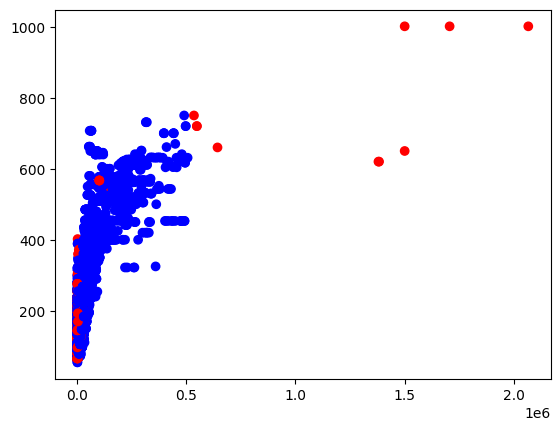

In [47]:
colors = cars["lof"].map({1: "blue", -1: "red"})
plt.scatter(cars["MSRP"], cars["Engine HP"], c = colors)

In [48]:
from sklearn.ensemble import IsolationForest

In [53]:
iso_forest = IsolationForest(n_estimators = 20)

In [54]:
iso_forest.fit_predict(cars_encoded)

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
cars["iso_forest"] = iso_forest.fit_predict(cars_encoded)

In [56]:
cars["iso_forest"].value_counts()

iso_forest
 1    11808
-1        4
Name: count, dtype: int64